# Exploring data

We will use the MovieLens 100K dataset for performing our initial survey of user and movie data. 

See http://files.grouplens.org/datasets/movielens/ml-100k-README.txt for more information on this dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!rm -f /tmp/ml-100k.zip
!rm -rf /tmp/ml-100k
!wget -O /tmp/ml-100k.zip http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -j -o /tmp/ml-100k.zip -d /tmp/ml-100k

--2018-05-05 08:01:14--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘/tmp/ml-100k.zip’

/tmp/ml-100k.zip    100%[===================>]   4.70M  20.9MB/s    in 0.2s    

2018-05-05 08:01:14 (20.9 MB/s) - ‘/tmp/ml-100k.zip’ saved [4924029/4924029]

Archive:  /tmp/ml-100k.zip
  inflating: /tmp/ml-100k/allbut.pl  
  inflating: /tmp/ml-100k/mku.sh     
  inflating: /tmp/ml-100k/README     
  inflating: /tmp/ml-100k/u.data     
  inflating: /tmp/ml-100k/u.genre    
  inflating: /tmp/ml-100k/u.info     
  inflating: /tmp/ml-100k/u.item     
  inflating: /tmp/ml-100k/u.occupation  
  inflating: /tmp/ml-100k/u.user     
  inflating: /tmp/ml-100k/u1.base    
  inflating: /tmp/ml-100k/u1.test    
  inflating: /tmp/ml-100k/u2.bas

# MovieLens Dataset Info

We can parse the file u.info to find details about this dataset

```
u.info     -- The number of users, items, and ratings in the u data set.
```

In [4]:
%cd /tmp/ml-100k
!cat u.info

/tmp/ml-100k
943 users
1682 items
100000 ratings


## Movies

Let's start by looking at the movie data which represent the items that are rated and recommended

First, we will look at the u.genre to understand how these movies are categorized

In [5]:
!cat u.genre

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9
Film-Noir|10
Horror|11
Musical|12
Mystery|13
Romance|14
Sci-Fi|15
Thriller|16
War|17
Western|18



To find the information about each movie title in our dataset, we check the u.item file

```
u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.
```

In [6]:
!head -10 u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

The list of items has several columns of 0/1 which represent the one-hot encoding of genere information -- we'll add that to our table header as we load the data in a Pandas dataframe

In [7]:
items = pd.read_csv("u.item", encoding = "ISO-8859-1", sep='|', header=None,
    names=['title', 'published','', 'url','genre_unknown', 'genre_action', 'genre_adventure', 'genre_animation', 'genre_childrens','genre_comedy','genre_crime','genre_documentary','genre_drama','genre_fantasy','genre_film-noir','genre_horror','genre_musical','genre_mystery','genre_romance','genre_scifi','genre_thriller','genre_war','genre_western'])
items.head()

,title,published,,url,genre_unknown,genre_action,genre_adventure,genre_animation,genre_childrens,genre_comedy,...,genre_fantasy,genre_film-noir,genre_horror,genre_musical,genre_mystery,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Users

We have some limited demographics data about users:

```
u.user     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.
```
Let's have a look

In [58]:
!cat u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703
11|39|F|other|30329
12|28|F|other|06405
13|47|M|educator|29206
14|45|M|scientist|55106
15|49|F|educator|97301
16|21|M|entertainment|10309
17|30|M|programmer|06355
18|35|F|other|37212
19|40|M|librarian|02138
20|42|F|homemaker|95660
21|26|M|writer|30068
22|25|M|writer|40206
23|30|F|artist|48197
24|21|F|artist|94533
25|39|M|engineer|55107
26|49|M|engineer|21044
27|40|F|librarian|30030
28|32|M|writer|55369
29|41|M|programmer|94043
30|7|M|student|55436
31|24|M|artist|10003
32|28|F|student|78741
33|23|M|student|27510
34|38|F|administrator|42141
35|20|F|homemaker|42459
36|19|F|student|93117
37|23|M|student|55105
38|28|F|other|54467
39|41|M|entertainment|01040
40|38|M|scientist|27514
41|33|M|engineer|80525
42|30|M|administrator|17870
43|29|F|librarian|20854
44|26|M|technic

Users are identified by age, gender, occupation and postal code

In [59]:
users = pd.read_csv("u.user", sep='|', header=None, 
    names=['userid', 'age', 'gender', 'occupation', 'postal_code'])
users.head()

,userid,age,gender,occupation,postal_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


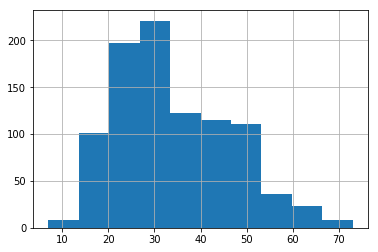

In [60]:
users['age'].hist(bins=10)

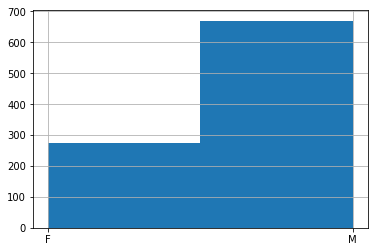

In [64]:
users['gender'].hist(bins=2)

*We'll return to users analysis later when we perform user clustering in 02_clustering_users.ipynb*

# Ratings

Let's now have a look at the ratings data -- the u.data file contains individual user preference for movies/items as specified in 1 (least liked) to 5(most liked) ratings for a limited set of movies.

```
u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC   
```

In [8]:
data = pd.read_csv("u.data", sep='\t', header=None, 
    names=['userid', 'movieid', 'rating', 'timestamp'])
data.head()

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
print("Number of Users: %d" % (data['userid'].max()))
print("Number of Movies: %d" % (data['movieid'].max()))

Number of Users: 943
Number of Movies: 1682


Text(0.5,1,'Ratings count distribution')

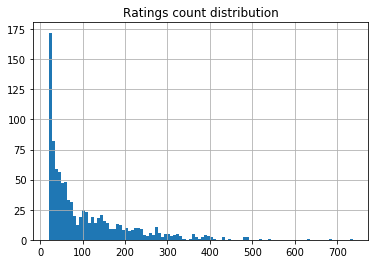

In [10]:
by_user = data.groupby('userid')
ratings_hist = by_user['movieid'].count().hist(bins=100)
ratings_hist.set_title('Ratings count distribution')

In [11]:
cust_size = by_user.size()
cust_size.sample(random_state=42)

#print(cust_size)
#cust_size.plot(kind='bar')
#cust_size.count()

userid
97    63
dtype: int64

In [12]:
data['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [41]:
toy_story=data[(data.movieid == 1)]
toy_story.head()
#toy_story['rating'].hist()

count    452.000000
mean       3.878319
std        0.927897
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [46]:
toy_story['rating'].mean()

3.8783185840707963

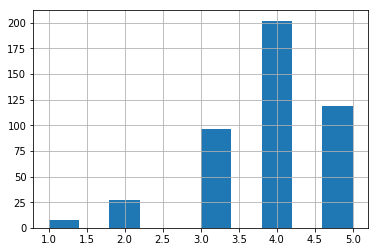

In [49]:
toy_story['rating'].hist()